# Loading Necessary Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
%matplotlib inline

# Loading Dataset

In [2]:
hour_df = pd.read_csv('C:/Users/satis/Marketing Analytics/datasets/Bike-Sharing/hour.csv')
print("Shape of dataset::{}".format(hour_df.shape))

Shape of dataset::(17379, 17)


In [3]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
hour_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

### Cleaning the attribute names to make it more meaningful

In [5]:
hour_df.rename(columns={'instant':'rec_id','dteday':'datetime','holiday':'is_holiday','workingday':'is_workingday',
                        'weathersit':'weather_condition','hum':'humidity','mnth':'month','cnt':'total_count','hr':'hour',
                        'yr':'year'},inplace=True)

### Performing type casting of attributes

In [6]:
# date time conversion
hour_df['datetime'] = pd.to_datetime(hour_df.datetime)

# categorical variables
hour_df['season'] = hour_df.season.astype('category')
hour_df['is_holiday'] = hour_df.is_holiday.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
hour_df['weather_condition'] = hour_df.weather_condition.astype('category')
hour_df['is_workingday'] = hour_df.is_workingday.astype('category')
hour_df['month'] = hour_df.month.astype('category')
hour_df['year'] = hour_df.year.astype('category')
hour_df['hour'] = hour_df.hour.astype('category')

In [7]:
hour_df.head()

,rec_id,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# Exploratory Data Analysis

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   rec_id             17379 non-null  int64         
 1   datetime           17379 non-null  datetime64[ns]
 2   season             17379 non-null  category      
 3   year               17379 non-null  category      
 4   month              17379 non-null  category      
 5   hour               17379 non-null  category      
 6   is_holiday         17379 non-null  category      
 7   weekday            17379 non-null  category      
 8   is_workingday      17379 non-null  category      
 9   weather_condition  17379 non-null  category      
 10  temp               17379 non-null  float64       
 11  atemp              17379 non-null  float64       
 12  humidity           17379 non-null  float64       
 13  windspeed          17379 non-null  float64       
 14  casual

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020D353D4F10>,
      dtype=object)

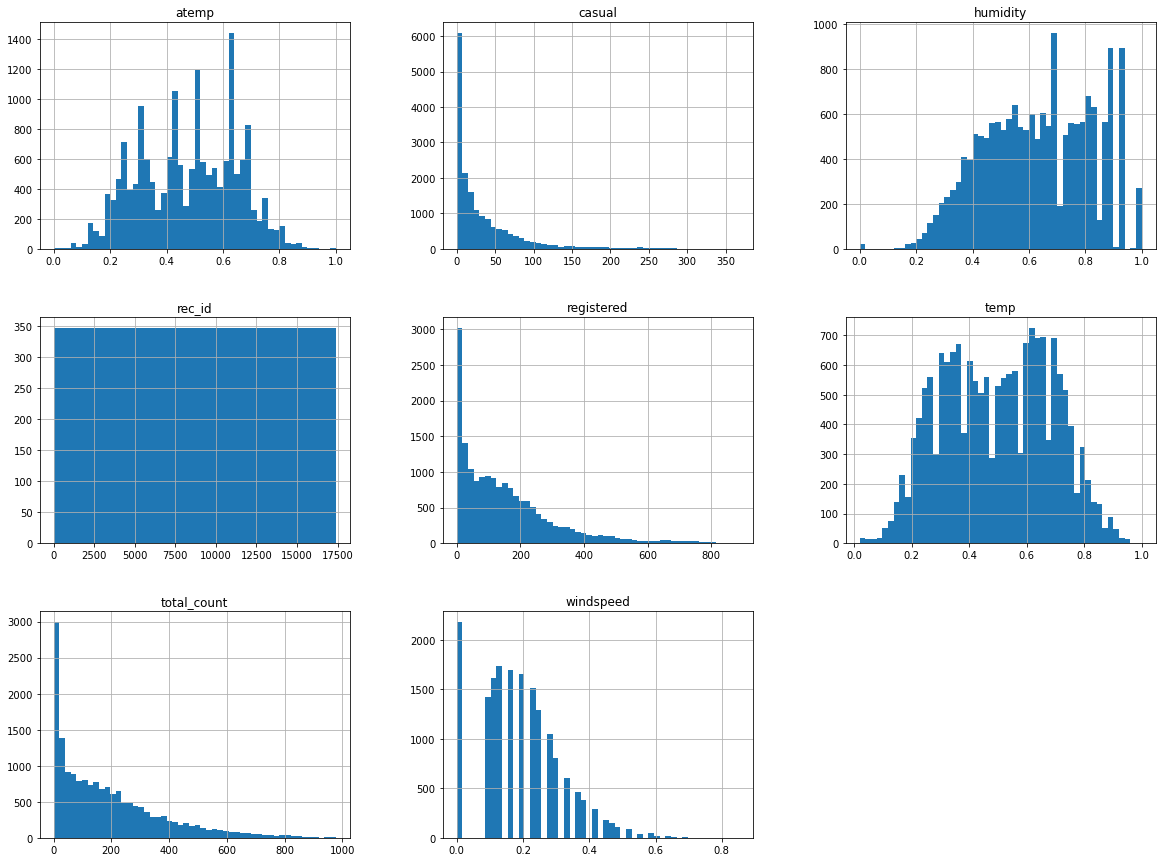

In [9]:
hour_df.hist(bins=50, figsize=(20,15))

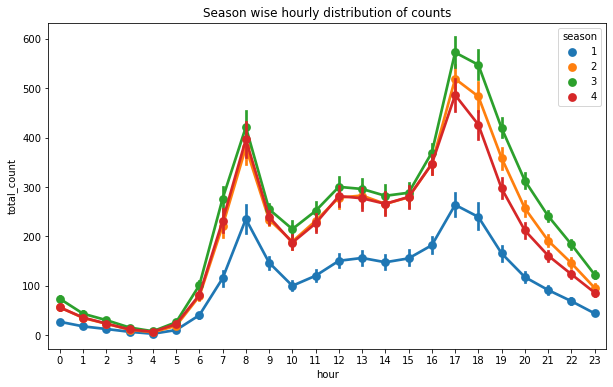

In [10]:
fig,ax = plt.subplots(figsize=(10,6))
sns.pointplot(data=hour_df[['hour','total_count','season']],x='hour',y='total_count',hue='season',ax=ax)
ax.set(title="Season wise hourly distribution of counts")
plt.show()

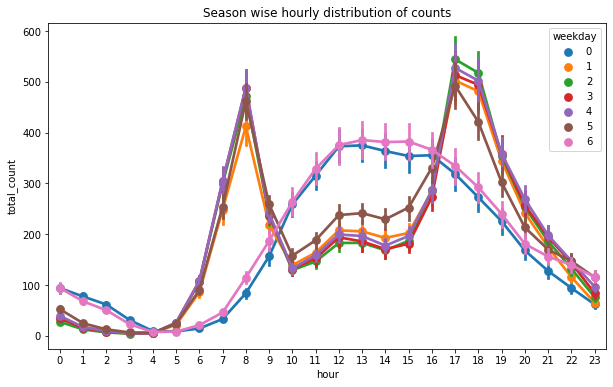

In [11]:
fig,ax = plt.subplots(figsize=(10,6))
sns.pointplot(data=hour_df[['hour','total_count','weekday']],x='hour',y='total_count',hue='weekday',ax=ax)
ax.set(title="Day wise hourly distribution of counts")
plt.show()

Visualizing monthly ridership details

[Text(0.5, 1.0, 'Monthly distribution of counts')]

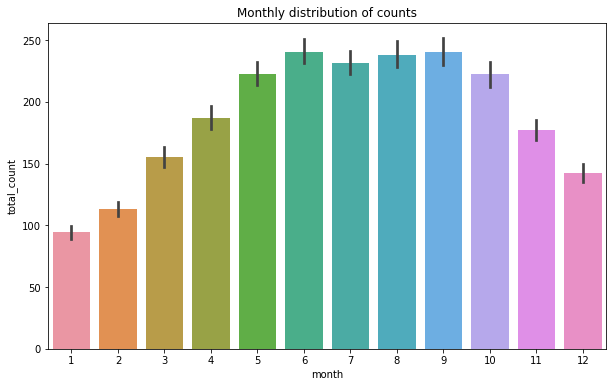

In [12]:
fig,ax = plt.subplots(figsize=(10,6))
sns.barplot(data=hour_df[['month','total_count']],x="month",y="total_count")
ax.set(title="Monthly distribution of counts")
#plt.show()

The bar plot shows a trend in ridership based on month, June-September shows highest ridership

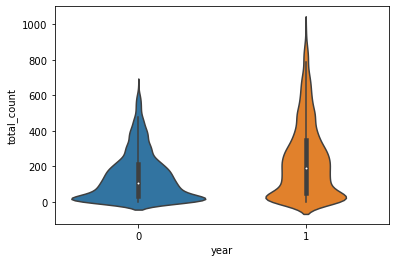

In [13]:
sns.violinplot(data=hour_df[['year', 'total_count']], x="year",y="total_count")
#plt.show()

Distribution at Year Level

Finding Outliers

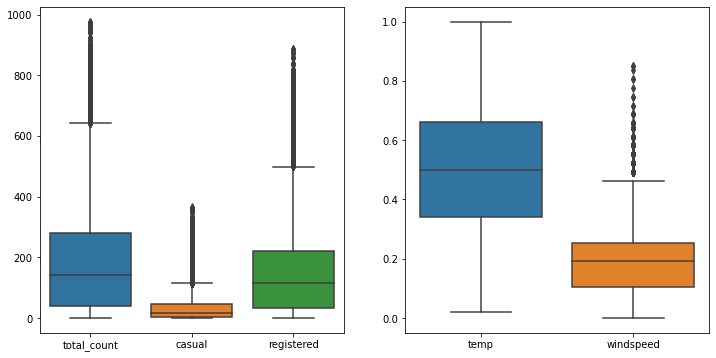

In [14]:
fig,(ax1,ax2)= plt.subplots(ncols=2,figsize=(12,6))
sns.boxplot(data=hour_df[['total_count','casual','registered']],ax=ax1)
sns.boxplot(data=hour_df[['temp','windspeed']],ax=ax2)

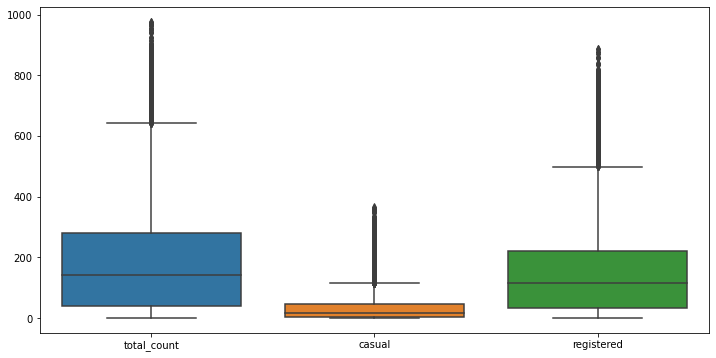

In [15]:
fig,ax= plt.subplots(figsize=(12,6))
sns.boxplot(data=hour_df[['total_count','casual','registered']],ax=ax)

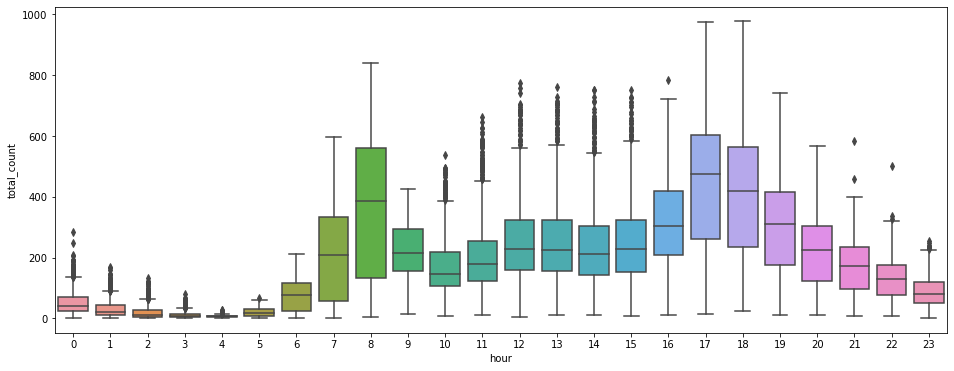

In [16]:
fig,ax= plt.subplots(figsize=(16,6))
sns.boxplot(data=hour_df[['hour','total_count']],x='hour',y='total_count',ax=ax)

# Working Day  vs Holiday Distribution

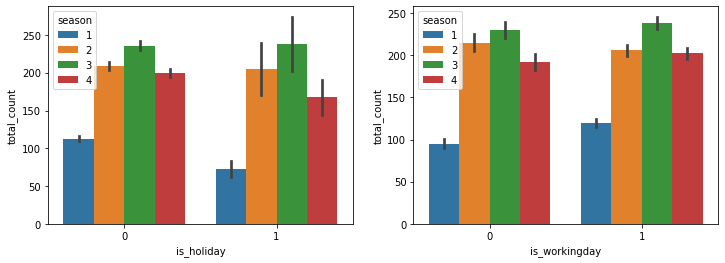

In [17]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,4))
sns.barplot(data=hour_df,x='is_holiday',y='total_count',hue='season',ax=ax1)
sns.barplot(data=hour_df,x='is_workingday',y='total_count',hue='season',ax=ax2)

# Correlation

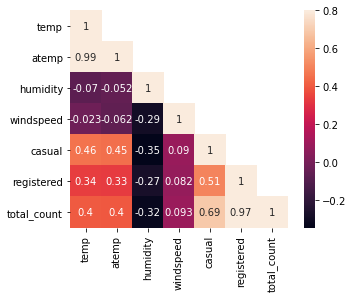

In [18]:
corrMatt = hour_df[["temp","atemp",
                    "humidity","windspeed",
                    "casual","registered",
                    "total_count"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False #return the lower index of the correlation matrix
sns.heatmap(corrMatt, mask=mask,
           vmax=.8, square=True,annot=True)

- Correlation between temp and atemp is very high (as expected)
- Same is the case with registered-total_count and casual-total_count
- Windspeed to humidity has negative correlation
- Overall correlational statistics are not very high.

In [19]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020D365A70D0>,
      dtype=object)

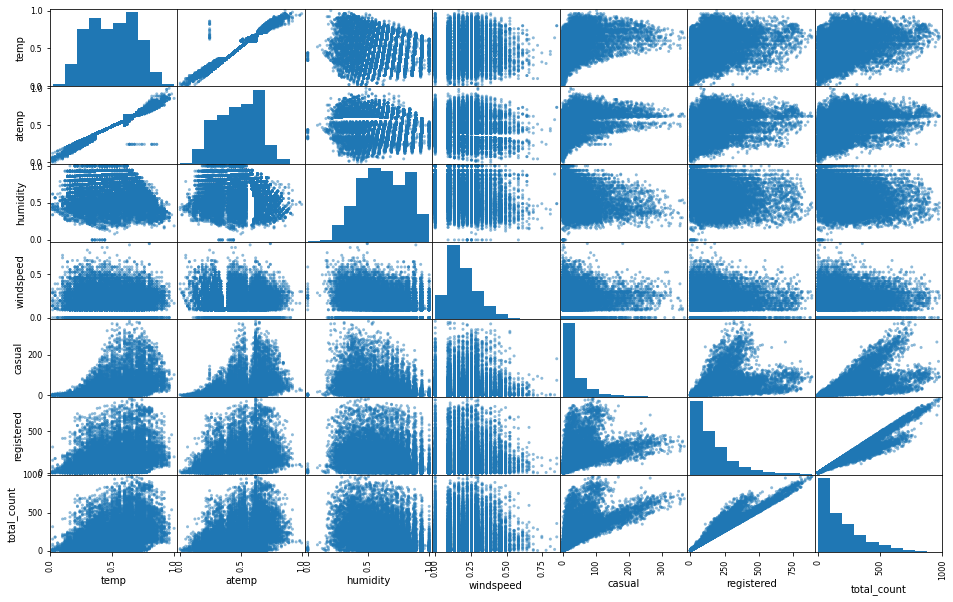

In [20]:
corr_attributes=["temp","atemp",
                    "humidity","windspeed",
                    "casual","registered",
                    "total_count"]
scatter_matrix(hour_df[corr_attributes], figsize=(16,10))

# Data Preprocessing

In [21]:
num_attribs=["temp","atemp","humidity","windspeed"] #,"casual","registered"]
cat_attribs=["season","year","month","hour","is_holiday","weekday","is_workingday","weather_condition"]
hour_num=hour_df[num_attribs]
hour_cat=hour_df[cat_attribs]
hour_y=hour_df['total_count']

In [22]:
cat_subset=['season','is_holiday','weather_condition','is_workingday']

# Training and testing split

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X, X_test, y, y_test = train_test_split(hour_df.iloc[:,0:-3], hour_df.iloc[:,-1], 
                                                    test_size=0.33, random_state=42)

X.reset_index(inplace=True)
y = y.reset_index()

X_test.reset_index(inplace=True)
y_test = y_test.reset_index()

print("Training set::{}{}".format(X.shape,y.shape))
print("Testing set::{}".format(X_test.shape))

Training set::(11643, 15)(11643, 2)
Testing set::(5736, 15)


In [25]:
X.head()

,index,rec_id,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed
0,5749,5750,2011-09-02,3,0,9,0,0,5,1,1,0.64,0.6061,0.65,0.1940
1,1843,1844,2011-03-22,2,0,3,13,0,2,1,1,0.50,0.4848,0.45,0.2239
2,13855,13856,2012-08-05,3,1,8,12,0,0,0,1,0.86,0.8030,0.47,0.5224
3,9723,9724,2012-02-15,1,1,2,2,0,3,1,1,0.30,0.3333,0.61,0.0000
4,10981,10982,2012-04-07,2,1,4,17,0,6,0,1,0.54,0.5152,0.19,0.4179


In [26]:
X_test.head()

,index,rec_id,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed
0,12830,12831,2012-06-23,3,1,6,19,0,6,0,1,0.80,0.6970,0.27,0.1940
1,8688,8689,2012-01-02,1,1,1,20,1,1,0,1,0.24,0.2273,0.41,0.2239
2,7091,7092,2011-10-28,4,0,10,2,0,5,1,1,0.32,0.3030,0.66,0.2836
3,12230,12231,2012-05-29,2,1,5,19,0,2,1,1,0.78,0.7121,0.52,0.3582
4,431,432,2011-01-20,1,0,1,0,0,4,1,1,0.26,0.2273,0.56,0.3881


In [27]:
y.head()

,index,total_count
0,5749,64
1,1843,106
2,13855,491
3,9723,4
4,10981,567


In [28]:
y_test.head()

,index,total_count
0,12830,425
1,8688,88
2,7091,4
3,12230,526
4,431,13


### Plotting QQ Plot to check for Normality

In [29]:
import scipy.stats as stats

((array([-3.94509974, -3.7271979 , -3.60788822, ...,  3.60788822,
          3.7271979 ,  3.94509974]),
  array([  1,   1,   1, ..., 970, 976, 977])),
 (169.56208274455793, 189.4630876345015, 0.9346293252087192))

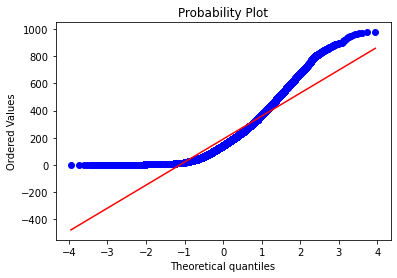

In [30]:
stats.probplot(hour_df['total_count'].tolist(),dist='norm',plot=plt)

# Label Encoding and One Hot Encoding

In [32]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [33]:
def train_encode_ohe(df,attrib):
    
    #label encoding
    encoder=LabelEncoder()
    encoded_label = encoder.fit_transform(df[attrib])
    df[attrib+'_label'] = encoded_label
    
    #Onehot Encoding
    ohe=OneHotEncoder()
    feature_arr = ohe.fit_transform(df[[attrib+'_label']]).toarray()
    feature_labels = [attrib+'_'+str(cls_label) for cls_label in encoder.classes_]
    features_df = pd.DataFrame(feature_arr, columns=feature_labels)
    
    return encoder,ohe,features_df
    
def test_transform_ohe(df,le,ohe,col_name):
    
    # label encode
    col_labels = le.transform(df[col_name])
    df[col_name+'_label'] = col_labels
    
    # ohe 
    feature_arr = ohe.fit_transform(df[[col_name+'_label']]).toarray()
    feature_labels = [col_name+'_'+str(cls_label) for cls_label in le.classes_]
    features_df = pd.DataFrame(feature_arr, columns=feature_labels)
    
    return features_df   

In [34]:
encoded_attr_list = []
for att in cat_attribs:
    return_obj=train_encode_ohe(X,att)
    encoded_attr_list.append({'label_enc':return_obj[0],
                              'ohe_enc':return_obj[1],
                              'feature_df':return_obj[2],
                              'col_name':att})

In [35]:
feature_df_list = [X[num_attribs]]
feature_df_list.extend([enc['feature_df'] \
                        for enc in encoded_attr_list \
                        if enc['col_name'] in cat_subset])

train_df_new = pd.concat(feature_df_list, axis=1)
print("Shape::{}".format(train_df_new.shape))

Shape::(11643, 16)


In [36]:
train_df_new.head()

,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,is_holiday_0,is_holiday_1,is_workingday_0,is_workingday_1,weather_condition_1,weather_condition_2,weather_condition_3,weather_condition_4
0,0.64,0.6061,0.65,0.1940,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.50,0.4848,0.45,0.2239,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.86,0.8030,0.47,0.5224,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.30,0.3333,0.61,0.0000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.54,0.5152,0.19,0.4179,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


# Selecting and Training Model

### Linear Regression

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [38]:
X = train_df_new
y = y.total_count.values.reshape(-1,1)

lin_reg = LinearRegression()

### Cross Validation

In [39]:
predicted = cross_val_predict(lin_reg, X, y, cv=10)
r2_scores = cross_val_score(lin_reg, X, y, cv=10)
mse_scores = cross_val_score(lin_reg, X, y, cv=10,scoring='neg_mean_squared_error')
print("R-squared::{}".format(r2_scores))
print("MSE::{}".format(mse_scores))
lin_reg.fit(X,y)

R-squared::[0.26906982 0.22635143 0.26170837 0.25691577 0.32148609 0.31196355
 0.26400442 0.28760857 0.27964318 0.31554976]
MSE::[-23850.18552648 -24978.92079695 -24408.88562232 -22517.19952749
 -22117.37661082 -24746.90893471 -25327.37663767 -25328.57026724
 -25094.24038362 -21876.91293786]


LinearRegression()

### Test Dataset Performance

In [40]:
test_encoded_attr_list = []
for enc in encoded_attr_list:
    col_name = enc['col_name']
    le = enc['label_enc']
    ohe = enc['ohe_enc']
    test_encoded_attr_list.append({'feature_df':test_transform_ohe(X_test,
                                                              le,ohe,
                                                              col_name),
                                   'col_name':col_name})
    
    
test_feature_df_list = [X_test[num_attribs]]
test_feature_df_list.extend([enc['feature_df'] \
                             for enc in test_encoded_attr_list \
                             if enc['col_name'] in cat_subset])

test_df_new = pd.concat(test_feature_df_list, axis=1) 
print("Shape::{}".format(test_df_new.shape))

Shape::(5736, 16)


In [41]:
test_df_new.head()

,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,is_holiday_0,is_holiday_1,is_workingday_0,is_workingday_1,weather_condition_1,weather_condition_2,weather_condition_3,weather_condition_4
0,0.80,0.6970,0.27,0.1940,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.24,0.2273,0.41,0.2239,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.32,0.3030,0.66,0.2836,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.78,0.7121,0.52,0.3582,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.26,0.2273,0.56,0.3881,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [42]:
X_test = test_df_new
y_test = y_test.total_count.values.reshape(-1,1)

y_pred = lin_reg.predict(X_test)

residuals = y_test-y_pred

In [43]:
r2_score = lin_reg.score(X_test,y_test)
print("R-squared::{}".format(r2_score))
print("MSE: %.2f"
      % mean_squared_error(y_test, y_pred))

R-squared::0.2867680055878652
MSE: 22753.14


## Decision Tree Regressor

In [44]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [45]:
dtr = DecisionTreeRegressor(max_depth=4,
                            min_samples_split=5,
                            max_leaf_nodes=10)
dtr.fit(X,y)

DecisionTreeRegressor(max_depth=4, max_leaf_nodes=10, min_samples_split=5)

In [46]:
dtr.score(X,y)

0.2665746776119763

### GridSearch with Cross Validation

In [47]:
param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [5,10], 
              "max_depth": [2, 6,8],
              "min_samples_leaf": [5,10,20], 
              "max_leaf_nodes": [5, 20, 100, 500]
              }

In [48]:
grid_cv_dtr = GridSearchCV(dtr, param_grid, cv=5)

In [49]:
grid_cv_dtr.fit(X,y)

GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(max_depth=4, max_leaf_nodes=10,
                                             min_samples_split=5),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 6, 8],
                         'max_leaf_nodes': [5, 20, 100, 500],
                         'min_samples_leaf': [5, 10, 20],
                         'min_samples_split': [5, 10]})

### Cross Validation: Best Model Details

In [51]:
print("R-Squared::{}".format(grid_cv_dtr.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_dtr.best_params_))

R-Squared::0.29472840660973104
Best Hyperparameters::
{'criterion': 'mse', 'max_depth': 8, 'max_leaf_nodes': 500, 'min_samples_leaf': 20, 'min_samples_split': 5}


In [52]:
dtr_df = pd.DataFrame(data=grid_cv_dtr.cv_results_)
dtr_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.016161,0.000334,0.003199,0.003918,mse,2,5,5,5,"{'criterion': 'mse', 'max_depth': 2, 'max_leaf...",0.172385,0.187745,0.220365,0.190915,0.238466,0.201975,0.023959,85
1,0.015971,0.000025,0.003211,0.003933,mse,2,5,5,10,"{'criterion': 'mse', 'max_depth': 2, 'max_leaf...",0.172385,0.187745,0.220365,0.190915,0.238466,0.201975,0.023959,85
2,0.014984,0.001617,0.004802,0.003921,mse,2,5,10,5,"{'criterion': 'mse', 'max_depth': 2, 'max_leaf...",0.172385,0.187745,0.220365,0.190915,0.238466,0.201975,0.023959,85
3,0.015995,0.000037,0.004797,0.003917,mse,2,5,10,10,"{'criterion': 'mse', 'max_depth': 2, 'max_leaf...",0.172385,0.187745,0.220365,0.190915,0.238466,0.201975,0.023959,85
4,0.015992,0.000003,0.003200,0.003919,mse,2,5,20,5,"{'criterion': 'mse', 'max_depth': 2, 'max_leaf...",0.172385,0.187745,0.220365,0.190915,0.238466,0.201975,0.023959,85


In [53]:
predicted = grid_cv_dtr.best_estimator_.predict(X)

In [54]:
r2_scores = cross_val_score(grid_cv_dtr.best_estimator_, X, y, cv=10)
mse_scores = cross_val_score(grid_cv_dtr.best_estimator_, X, y, cv=10,scoring='neg_mean_squared_error')

In [55]:
print("avg R-squared::{}".format(np.mean(r2_scores)))
print("MSE::{}".format(np.mean(mse_scores)))

avg R-squared::0.30744642968000135
MSE::-23089.90043082429


#### Selected Model

In [56]:
best_dtr_model = grid_cv_dtr.best_estimator_

### Test Dataset Performance

In [57]:
y_pred = best_dtr_model.predict(X_test)

In [58]:
r2_score = best_dtr_model.score(X_test,y_test)
print("R-squared::{}".format(r2_score))
print("MSE: %.2f"
      % mean_squared_error(y_test, y_pred))

R-squared::0.3238351376141839
MSE: 21570.64
